#    Lenet-5 Architecture Implementation

Import all the  required dependencies 

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv1D,Flatten,Input
from keras.layers.pooling import MaxPool1D

Using TensorFlow backend.


# Data Set Preparation and Pre-Processing

In [2]:
# Data Set Preparation
from keras.datasets import mnist
from keras.utils import np_utils
(train_data,train_label),(test_data,test_label)=mnist.load_data(path='/mnist.npz')

# Reshape and Make the Data Ready 
numPixels=train_data.shape[1]*train_data.shape[2]
Ntrain=train_data.shape[0]
Ntest=test_data.shape[0]


# Normalise the Data
train_data=train_data/255
test_data=test_data/255

# Convert Labels into One hot Encoded Vector
train_label = np_utils.to_categorical(train_label)
test_label = np_utils.to_categorical(test_label)
numclasses = test_label.shape[1]


# Reshape the data so that it can fed into Deep Learning Model
train_data=train_data.reshape(Ntrain,numPixels,1).astype('float32')
test_data=test_data.reshape(Ntest,numPixels,1).astype('float32')


#Sanity Check 
print('Shape of Trainning Data',train_data.shape)
print('Shape of Trainning Label',train_label.shape)
print('Shape of Testing Data',test_data.shape)
print('Shape of Testing Label',test_label.shape)

run=False

Shape of Trainning Data (60000, 784, 1)
Shape of Trainning Label (60000, 10)
Shape of Testing Data (10000, 784, 1)
Shape of Testing Label (10000, 10)


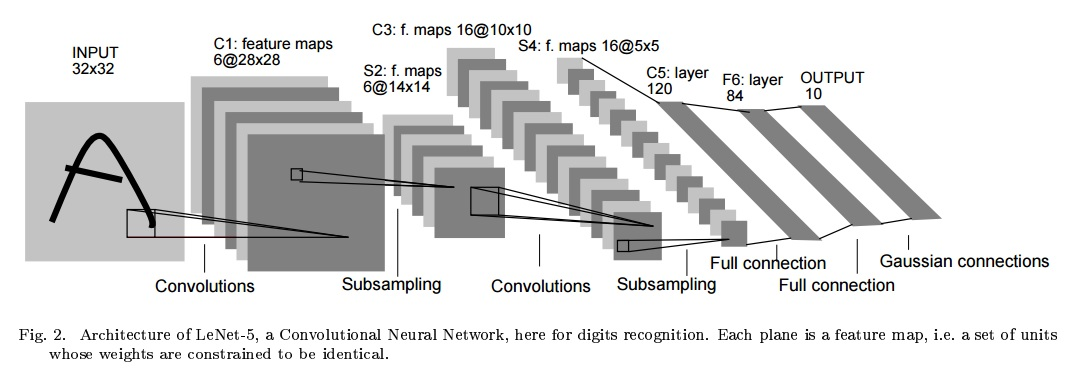

In [3]:
from IPython.display import Image
Image("Lenet5-Architecture.jpg")

In [4]:
model=Sequential()
model.add(Conv1D(batch_input_shape=(None,784,1),filters=6,kernel_size=5))
model.add(MaxPool1D(pool_size=2))
model.add(Conv1D(filters=16,kernel_size=5))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=120,activation='sigmoid'))
model.add(Dense(units=84,activation='sigmoid'))
model.add(Dense(units=10,activation='softmax'))


In [5]:
# Sanity Check for Model Definition and Layers
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 780, 6)            36        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 390, 6)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 386, 16)           496       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 193, 16)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3088)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               370680    
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

# Set Optimizer, Loss and Metrics

In [6]:
if run==True:
    model_saved_weights=model.load_weights(filepath='mnist_lenet_weights.h5')
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'],sample_weight_mode=model_saved_weights)
else:
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    run=True


In [7]:
model.fit(train_data, train_label,batch_size=64,epochs=10,verbose=1,validation_data=(test_data, test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 39s - loss: 0.3861 - acc: 0.9089 - val_loss: 0.1551 - val_acc: 0.9554
Epoch 2/10
60000/60000 [==============================] - 37s - loss: 0.1213 - acc: 0.9650 - val_loss: 0.1085 - val_acc: 0.9673
Epoch 3/10
60000/60000 [==============================] - 36s - loss: 0.0834 - acc: 0.9756 - val_loss: 0.0873 - val_acc: 0.9738
Epoch 4/10
60000/60000 [==============================] - 37s - loss: 0.0618 - acc: 0.9824 - val_loss: 0.0791 - val_acc: 0.9750
Epoch 5/10
60000/60000 [==============================] - 37s - loss: 0.0479 - acc: 0.9859 - val_loss: 0.0745 - val_acc: 0.9763
Epoch 6/10
60000/60000 [==============================] - 37s - loss: 0.0366 - acc: 0.9893 - val_loss: 0.0694 - val_acc: 0.9777
Epoch 7/10
60000/60000 [==============================] - 37s - loss: 0.0296 - acc: 0.9917 - val_loss: 0.0682 - val_acc: 0.9776
Epoch 8/10
60000/60000 [==============================

In [8]:
# Compute the Performance of the Model
loss,accuracy=model.evaluate(test_data,test_label,batch_size=1000,verbose=1)
print("Accuracy:",accuracy*100,'%')

10000/10000 [==============================] - 2s     
Accuracy: 97.6699995995 %


# Save the model for Future Reuse

In [10]:
# Save Trained Model for Future Use.
import h5py
model.save('mnist_lenet1d.h5')
model.save_weights('mnist_lenet_weights1d.h5')